In [1]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np


#Read Data

In [4]:
df=pd.read_csv('Algeria.csv')
df=df.dropna()
df.set_index('date', inplace=True)
print('Shape of data',df.shape)
df.iloc[:,0:5]

Shape of data (751, 14)


,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index
date,,,,,
7/17/2020,13.423,0.113,1.20,0.0,74.07
7/18/2020,13.604,0.249,1.18,0.0,74.07
7/20/2020,13.740,0.204,1.15,0.0,74.07
7/21/2020,13.287,0.294,1.14,0.0,74.07
7/22/2020,13.446,0.249,1.13,0.0,74.07
...,...,...,...,...,...
10/6/2022,0.091,0.045,0.64,0.0,45.32
10/7/2022,0.091,0.000,0.64,0.0,45.32
10/8/2022,0.000,0.000,0.64,0.0,45.32


#Plot Your Data

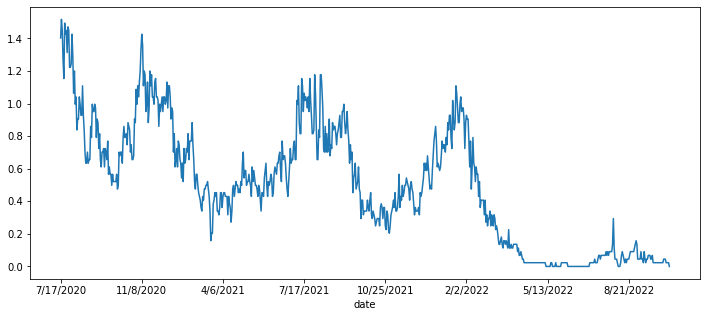

In [5]:
df['icu_patients_per_million'].plot(figsize=(12,5))

#Check For Stationarity

In [6]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [7]:
adf_test(df['icu_patients_per_million'])

1. ADF :  -2.158154966226196
2. P-Value :  0.2217816331413044
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 738
5. Critical Values :
	 1% :  -3.4392418578608983
	 5% :  -2.86546426916434
	 10% :  -2.568859710342903


#Figure Out Order for ARIMA Model

In [8]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
stepwise_fit = auto_arima(df['icu_patients_per_million'],exog=df.iloc[:,0:5],start_p=0, start_d=1, start_q=1, max_p=1, max_q=2, max_d=2 , start_P=1,start_Q=1, start_D=1, m=30  ,trace=True, seasonal=True,
                          suppress_warnings=True)           
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,1)(1,0,1)[30] intercept   : AIC=-1618.186, Time=8.34 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=-1564.952, Time=0.60 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=-1607.224, Time=4.99 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=-1620.224, Time=9.41 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=-1566.589, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[30] intercept   : AIC=-1622.130, Time=1.25 sec
 ARIMA(0,1,1)(1,0,0)[30] intercept   : AIC=-1620.230, Time=6.89 sec
 ARIMA(1,1,1)(0,0,0)[30] intercept   : AIC=-1633.086, Time=0.84 sec
 ARIMA(1,1,1)(1,0,0)[30] intercept   : AIC=-1631.175, Time=5.21 sec
 ARIMA(1,1,1)(0,0,1)[30] intercept   : AIC=-1631.172, Time=8.37 sec
 ARIMA(1,1,1)(1,0,1)[30] intercept   : AIC=-1629.147, Time=9.49 sec
 ARIMA(1,1,0)(0,0,0)[30] intercept   : AIC=-1609.019, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[30] intercept   : AIC=-1631.315, Time=0.65 sec
 ARIMA(0,1,2)(0,0,0)[30] intercept   : AIC=-1628.768, Time=0.64 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  751
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 819.851
Date:                Fri, 25 Nov 2022   AIC                          -1633.703
Time:                        00:57:51   BIC                          -1619.842
Sample:                             0   HQIC                         -1628.362
                                - 751                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3635      0.069      5.254      0.000       0.228       0.499
ma.L1         -0.6572      0.053    -12.324      0.000      -0.762      -0.553
sigma2         0.0066      0.000     29.645      0.000       0.006       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               240.51
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
#model=auto_arima(df['icu_patients'], start_p=0, start_q=0, d=0,max_p=5,max_q=5,max_d=5,start_P=0,D=0,start_Q=0, max_P=5, max_D=5, max_Q=5, seasonal= True, information_criteria='AIC' )
#model.summary()

In [11]:
from statsmodels.tsa.arima.model import ARIMA

#Split Data into Training and Testing

In [12]:
print(df.shape)
train=df.iloc[:-30,]
test=df.iloc[-30:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(751, 14)
(721, 14) (30, 14)


In [13]:
ts=df['icu_patients_per_million']
ts

date
7/17/2020     1.403
7/18/2020     1.517
7/20/2020     1.449
7/21/2020     1.268
7/22/2020     1.154
              ...  
10/6/2022     0.023
10/7/2022     0.023
10/8/2022     0.023
10/9/2022     0.023
10/10/2022    0.000
Name: icu_patients_per_million, Length: 751, dtype: float64

In [14]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#result = seasonal_decompose(ts, model='additive')
#result.plot()
#plt.show()

## Train the Model

In [21]:
model=auto_arima(y=train['icu_patients_per_million'],exog=train.iloc[:,0:1] ,order=(0,2,1),seasonal_order=(1,1,1,30) )
model=model.fit(y=train['icu_patients_per_million'])
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  721
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 772.769
Date:                Fri, 25 Nov 2022   AIC                          -1539.538
Time:                        01:07:15   BIC                          -1525.801
Sample:                             0   HQIC                         -1534.235
                                - 721                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3632      0.072      5.045      0.000       0.222       0.504
ma.L1         -0.6570      0.056    -11.835      0.000      -0.766      -0.548
sigma2         0.0068      0.000     28.371      0.000       0.006       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               196.44
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
#get the order
auto_order = model.get_params()['order']
from ThymeBoost import ThymeBoost as tb
boosted_model = tb.ThymeBoost(verbose=1)
output= boosted_model.fit(train['icu_patients_per_million'],trend_estimator='arima',
                            arima_order=auto_order,
                            global_cost='mse' )

********** Round 1 **********
Using Split: None
Fitting initial trend globally with trend model:
median()
seasonal model:
None
cost: 0.1324297766990291
********** Round 2 **********
Using Split: None
Fitting global with trend model:
arima((1, 1, 1))
seasonal model:
None
cost: 0.007971450787715106
Boosting Terminated 
Using round 2


#Make Predictions on Test Set

In [25]:
start=len(train)
end=len(train)+len(test)-1
pred=boosted_model.predict(output, len(test))
pred.index=df.index[start:end+1]
print(pred)

            predictions  predicted_trend  predicted_seasonality  \
date                                                              
9/11/2022      0.051281         0.051281                    0.0   
9/12/2022      0.051889         0.051889                    0.0   
9/13/2022      0.052110         0.052110                    0.0   
9/14/2022      0.052190         0.052190                    0.0   
9/15/2022      0.052219         0.052219                    0.0   
9/16/2022      0.052230         0.052230                    0.0   
9/17/2022      0.052234         0.052234                    0.0   
9/18/2022      0.052235         0.052235                    0.0   
9/19/2022      0.052236         0.052236                    0.0   
9/20/2022      0.052236         0.052236                    0.0   
9/21/2022      0.052236         0.052236                    0.0   
9/22/2022      0.052236         0.052236                    0.0   
9/23/2022      0.052236         0.052236                    0.

In [ ]:
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
#pred.index=index_future_dates
#pred.plot(legend=True)
#test['AvgTemp'].plot(legend=True)

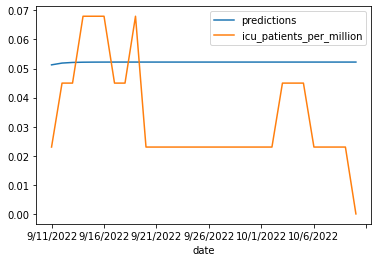

In [27]:
pred['predictions'].plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)

In [ ]:
test['icu_patients_per_million'].mean()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)


In [ ]:
model2=ARIMA(df['icu_patients_per_million'],order=(1,0,5),seasonal_order=(1,1,1,30))
model2=model2.fit()
df.tail()

#For Future Dates

In [ ]:
index_future_dates=pd.date_range(start='2022-04-24',end='2022-05-24')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

In [ ]:
pred.plot(figsize=(12,5),legend=True)
